In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('Sugarcane Production.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

## Data Cleaning

In [5]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [6]:
df.sample(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
93,93,Antigua and Barbuda,North America,5365,6217,83,64638.6
26,26,Swaziland,Africa,5583295,4816.299,57851,96511.4
67,67,Guinea,Africa,304975,25664,5683,53668.4
64,64,Taiwan,Asia,3958,16788,5917,66896.6
65,65,Uruguay,South America,3677,104878,76,48381.6


In [7]:
df.rename(columns={'Production (Tons)':'Production(Tons)'},inplace=True)
df.rename(columns={'Production per Person (Kg)':'Production_per_Person_(Kg)'},inplace=True)
df.rename(columns={'Acreage (Hectare)':'Acreage(Hectare)'},inplace=True)
df.rename(columns={'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)


In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Acreage(Hectare)              1
Yield(Kg/Hectare)             1
dtype: int64

In [10]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [11]:
df=df.dropna().reset_index()

In [12]:
df[df['Acreage(Hectare)'].isnull()]

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)


In [13]:
df.tail()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8
101,102,102,Syria,Asia,1,0,0,83034.2


In [14]:
df.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     102 non-null    object
 1   Continent                   102 non-null    object
 2   Production(Tons)            102 non-null    object
 3   Production_per_Person_(Kg)  102 non-null    object
 4   Acreage(Hectare)            102 non-null    object
 5   Yield(Kg/Hectare)           102 non-null    object
dtypes: object(6)
memory usage: 4.9+ KB


In [17]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)              object
Production_per_Person_(Kg)    object
Acreage(Hectare)              object
Yield(Kg/Hectare)             object
dtype: object

In [19]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person_(Kg)']=df['Production_per_Person_(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].str.replace('.','').astype(float)

In [20]:
df.dtypes

Country                        object
Continent                      object
Production(Tons)              float64
Production_per_Person_(Kg)    float64
Acreage(Hectare)              float64
Yield(Kg/Hectare)             float64
dtype: object

In [21]:
df.nunique()

Country                       102
Continent                       6
Production(Tons)              102
Production_per_Person_(Kg)    101
Acreage(Hectare)              101
Yield(Kg/Hectare)             102
dtype: int64

# Univariate Analysis

In [22]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,751675.0
1,India,Asia,348448000.0,260721.000,4950000.0,703935.0
2,China,Asia,123059739.0,88287.000,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264.303,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcane from each of the continents?

In [24]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

C:\Users\AMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Continent', ylabel='Count'>

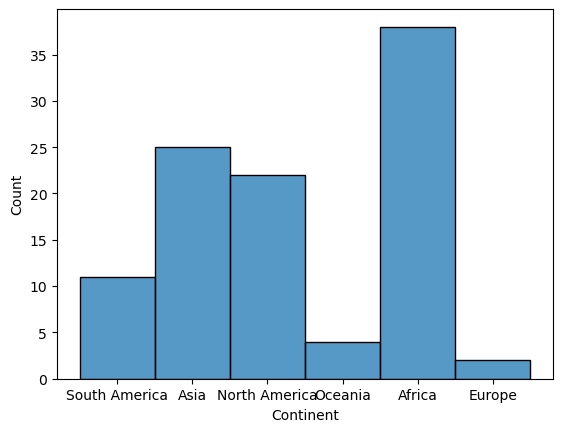

In [28]:
sns.histplot(data=df, x='Continent')


C:\Users\AMAN\AppData\Local\Temp\ipykernel_26376\1263434950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\AMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AMAN\AppData\Local\Temp\ipykernel_26376\1263434950.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flex

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

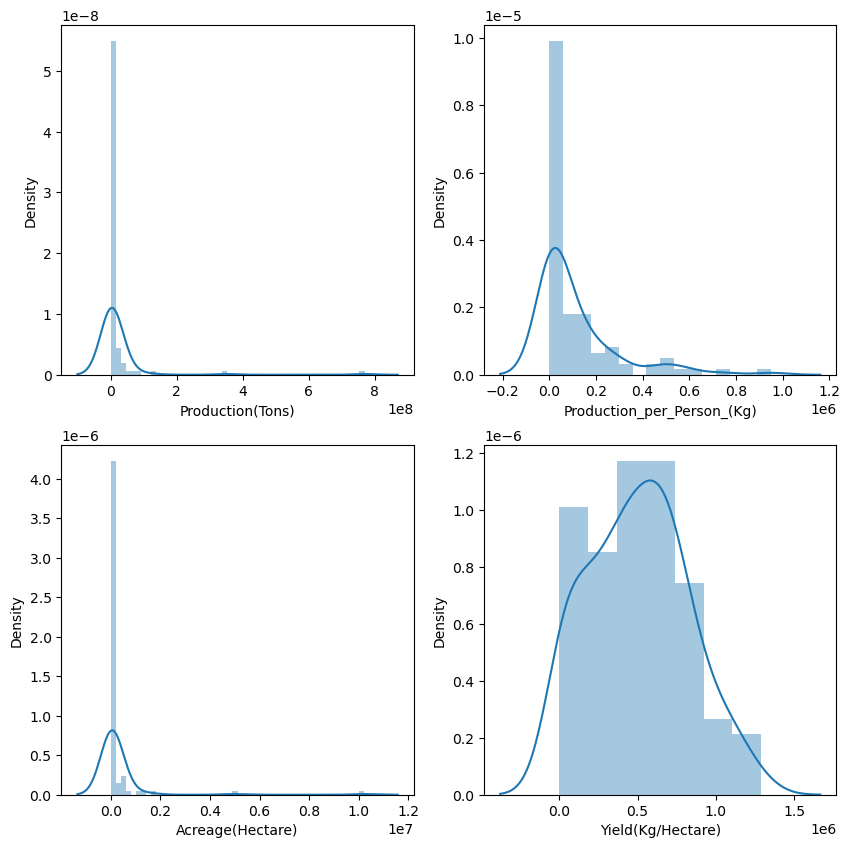

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person_(Kg)'])

plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])




### outliers?

<Axes: >

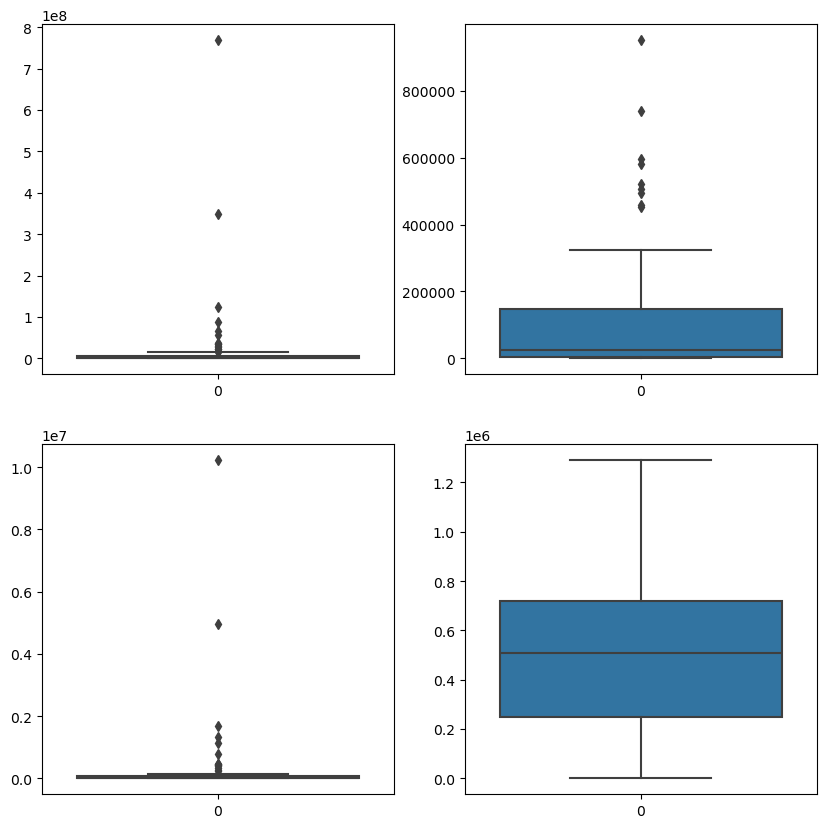

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person_(Kg)'])

plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])




### describe?


In [31]:
df.describe()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,1.020000e+02
mean,1.850372e+07,112952.435755,2.498981e+05,5.018502e+05
std,8.419149e+07,176651.341929,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000,0.000000e+00,1.000000e+01
25%,6.251875e+04,3671.910000,1.104000e+03,2.487505e+05
50%,1.440044e+06,25572.500000,1.655800e+04,5.102500e+05
75%,6.426824e+06,146384.750000,8.047400e+04,7.198920e+05
max,7.686784e+08,951087.000000,1.022620e+07,1.290493e+06


# BIVARIATE ANALYSIS

In [32]:
df_new=df[['Country','Production(Tons)']].set_index('Country')

In [33]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [35]:
df_new['Production(Tons)_new']=df_new['Production(Tons)']*100/df['Production(Tons)'].sum()

In [36]:
df_new

,Production(Tons),Production(Tons)_new
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_new'>

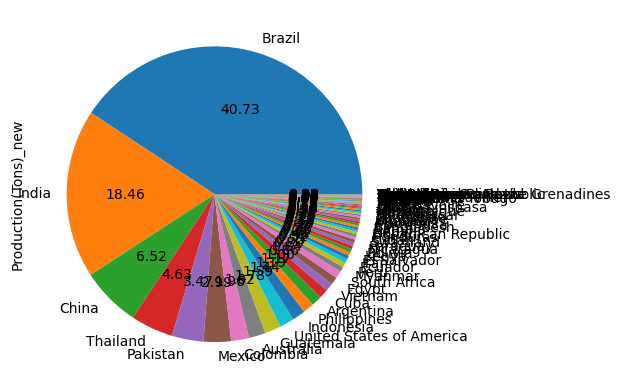

In [42]:
df_new['Production(Tons)_new'].plot(kind='pie',autopct='%.2f')

##### merge smaller contribution into one and then plot

<Axes: xlabel='Country'>

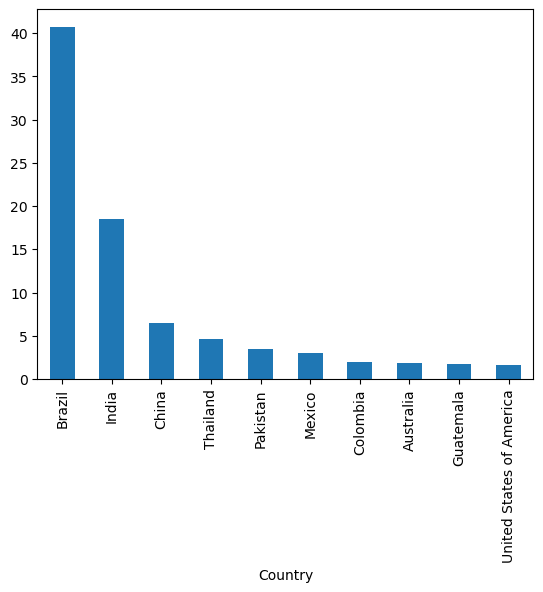

In [45]:
df_new['Production(Tons)_new'].head(10).plot(kind='bar')

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

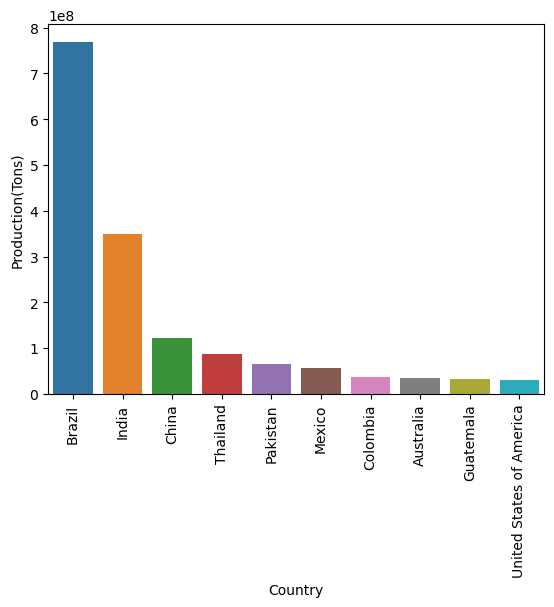

In [52]:
df_acr=df.sort_values("Production(Tons)",ascending=False)
ax=sns.barplot(data=df_acr.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Which country has maximum Land?

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

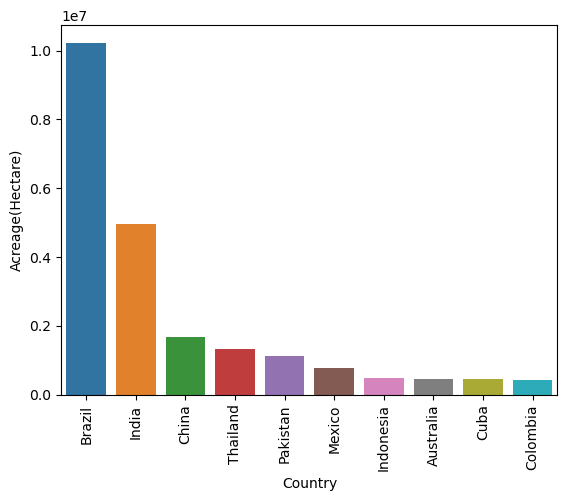

In [50]:
df_acr=df.sort_values("Acreage(Hectare)",ascending=False)

ax=sns.barplot(data=df_acr.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

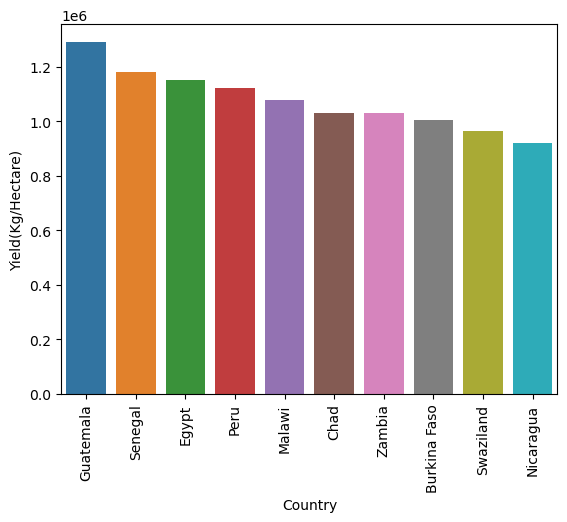

In [51]:
df_acr=df.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=df_acr.head(10),x='Country',y='Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Paraguay'),
 Text(1, 0, 'Colombia'),
 Text(2, 0, 'Trinidad and Tobago'),
 Text(3, 0, 'Panama'),
 Text(4, 0, 'Jamaica'),
 Text(5, 0, 'Ecuador'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Dominican Republic'),
 Text(8, 0, 'Mexico'),
 Text(9, 0, 'Pakistan')]

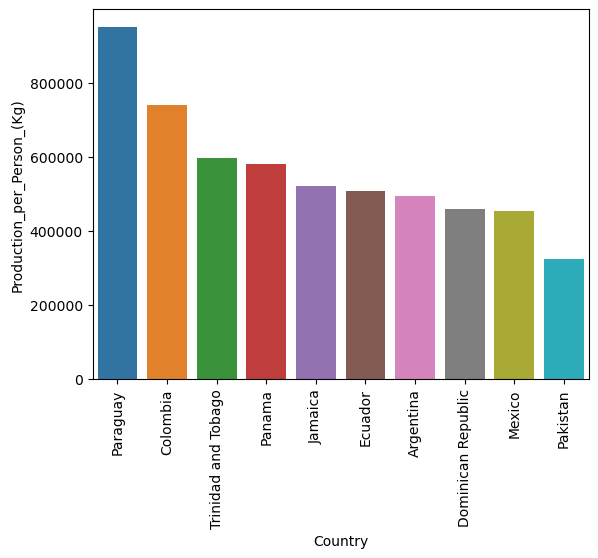

In [53]:
df_acr=df.sort_values("Production_per_Person_(Kg)",ascending=False)
ax=sns.barplot(data=df_acr.head(10),x='Country',y='Production_per_Person_(Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Correlation

In [54]:
df.corr()

ValueError: could not convert string to float: 'Brazil'

In [56]:
df_numeric = df.select_dtypes(include=[np.number])


In [58]:
df_numeric.corr()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.121125
Production_per_Person_(Kg),0.015000,1.000000,0.012557,-0.043603
Acreage(Hectare),0.997550,0.012557,1.000000,0.107826
Yield(Kg/Hectare),0.121125,-0.043603,0.107826,1.000000


<Axes: >

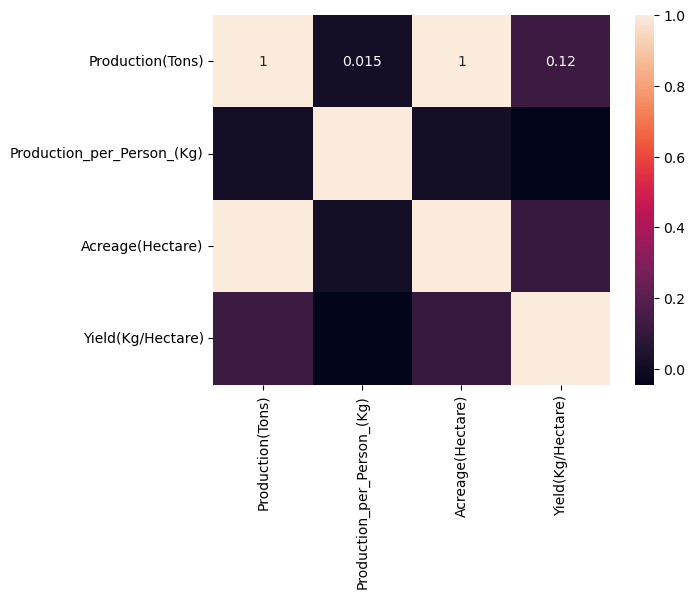

In [60]:
sns.heatmap(df_numeric.corr(),annot=True)

#### shows that acreage and production tons are very much related

# Do countries with highest land produce more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

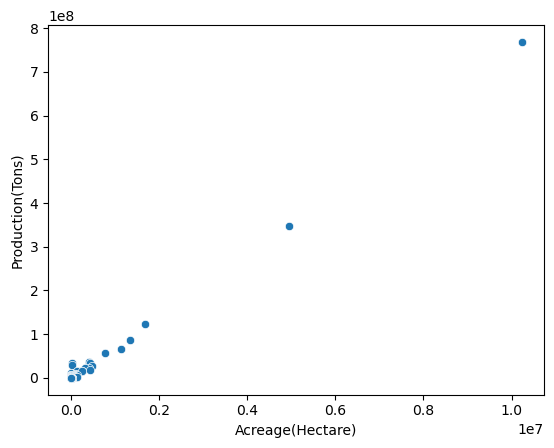

In [61]:
sns.scatterplot(data=df,x='Acreage(Hectare)',y='Production(Tons)')

# Do countries which produce more sugarcane perheactare produce more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

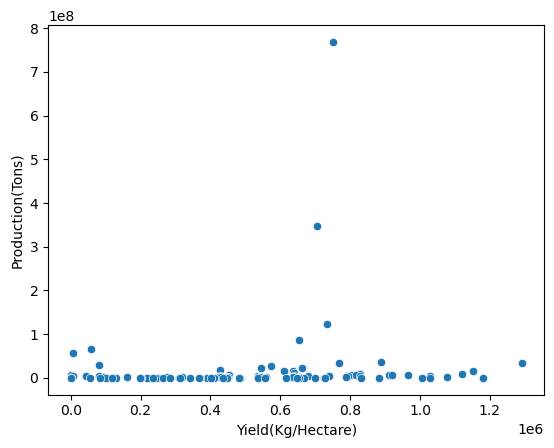

In [62]:
sns.scatterplot(data=df,x='Yield(Kg/Hectare)',y='Production(Tons)')

# CONTINENT

In [63]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,751675.0
1,India,Asia,348448000.0,260721.000,4950000.0,703935.0
2,China,Asia,123059739.0,88287.000,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264.303,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [64]:
df_continent=df.groupby('Continent').sum()

In [65]:
df_continent

,Country,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,20700454.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.000,71.0,1318709.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,1624191.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,6766896.0


In [66]:
df_continent.drop('Country',axis=1)

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,20700454.0
Asia,721930425.0,1857769.303,10608319.0,11197308.0
Europe,5823.0,536.000,71.0,1318709.0
North America,173995947.0,3796081.508,1581983.0,9581162.0
Oceania,36177574.0,28593.605,490909.0,1624191.0
South America,865588126.0,3505531.738,11369236.0,6766896.0


<Axes: xlabel='Continent'>

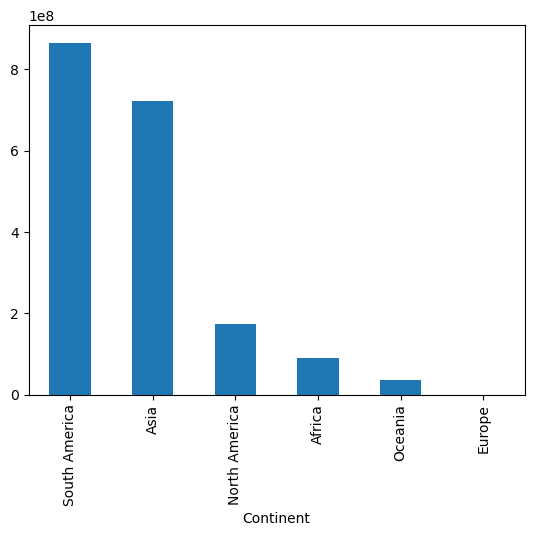

In [67]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Continent'>

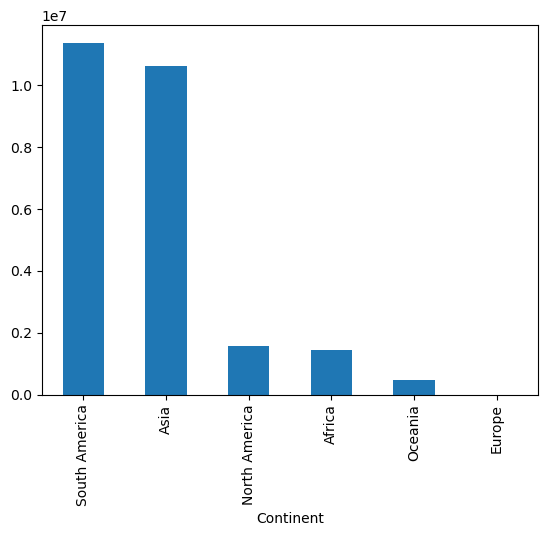

In [68]:
df_continent['Acreage(Hectare)'].sort_values(ascending=False).plot(kind='bar')

# Do number of countries in a Continent affects production of Sugarcane?

In [71]:
df_continent['number_of_countries']=df.groupby('Continent').count()['Country']

C:\Users\AMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AMAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


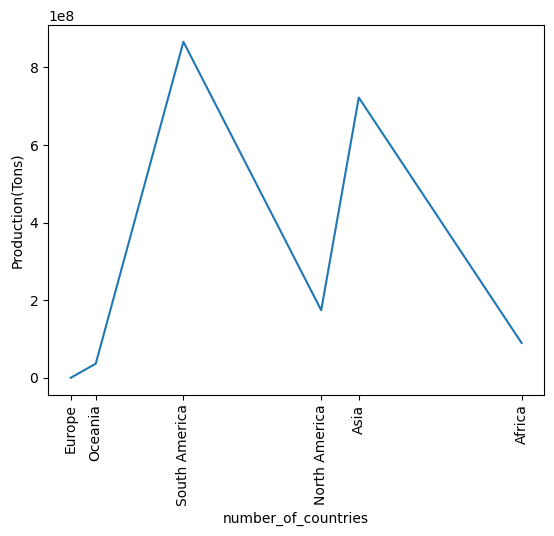

In [76]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x='number_of_countries',y='Production(Tons)')
plt.xticks(df_continent['number_of_countries'],continent_names,rotation=90)
plt.show()

In [78]:
df_c_numeric=df_continent.drop('Country',axis=1)

In [79]:
df_c_numeric.corr()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.104312,0.109244
Production_per_Person_(Kg),0.522211,1.000000,0.463215,0.523627,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.126764,0.132817
Yield(Kg/Hectare),0.104312,0.523627,0.126764,1.000000,0.983807
number_of_countries,0.109244,0.540086,0.132817,0.983807,1.000000


<Axes: ylabel='Production(Tons)'>

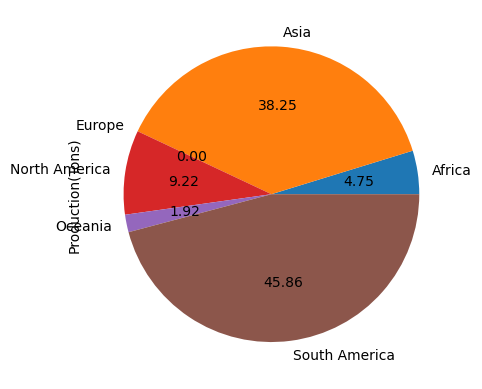

In [80]:
df_continent['Production(Tons)'].plot(kind='pie',autopct='%.2f')